In [2]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline

In [2]:
with open('all_data_clean_original.pickle', 'rb') as f:
    project_df = pickle.load(f)

In [6]:
print(project_df.start_date.min())
print(project_df.start_date.max())

datetime.date(2014, 12, 2)

In [10]:
project_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55808 entries, 0 to 55877
Data columns (total 12 columns):
kickstarter_page       55808 non-null object
category               55808 non-null object
description_length     55808 non-null int64
n_pledges              55808 non-null int64
pledge_level_min       55808 non-null float64
pledge_level_max       55808 non-null float64
pledge_level_stddev    55808 non-null float64
funding_actual         55808 non-null float64
funding_goal           55808 non-null float64
n_backers              55808 non-null object
start_date             55808 non-null object
duration               55808 non-null int64
dtypes: float64(5), int64(3), object(4)
memory usage: 8.0+ MB


In [11]:
numeric_df = project_df.drop(columns=['kickstarter_page', 'category'])
numeric_df = numeric_df.astype({'n_backers': 'int'})

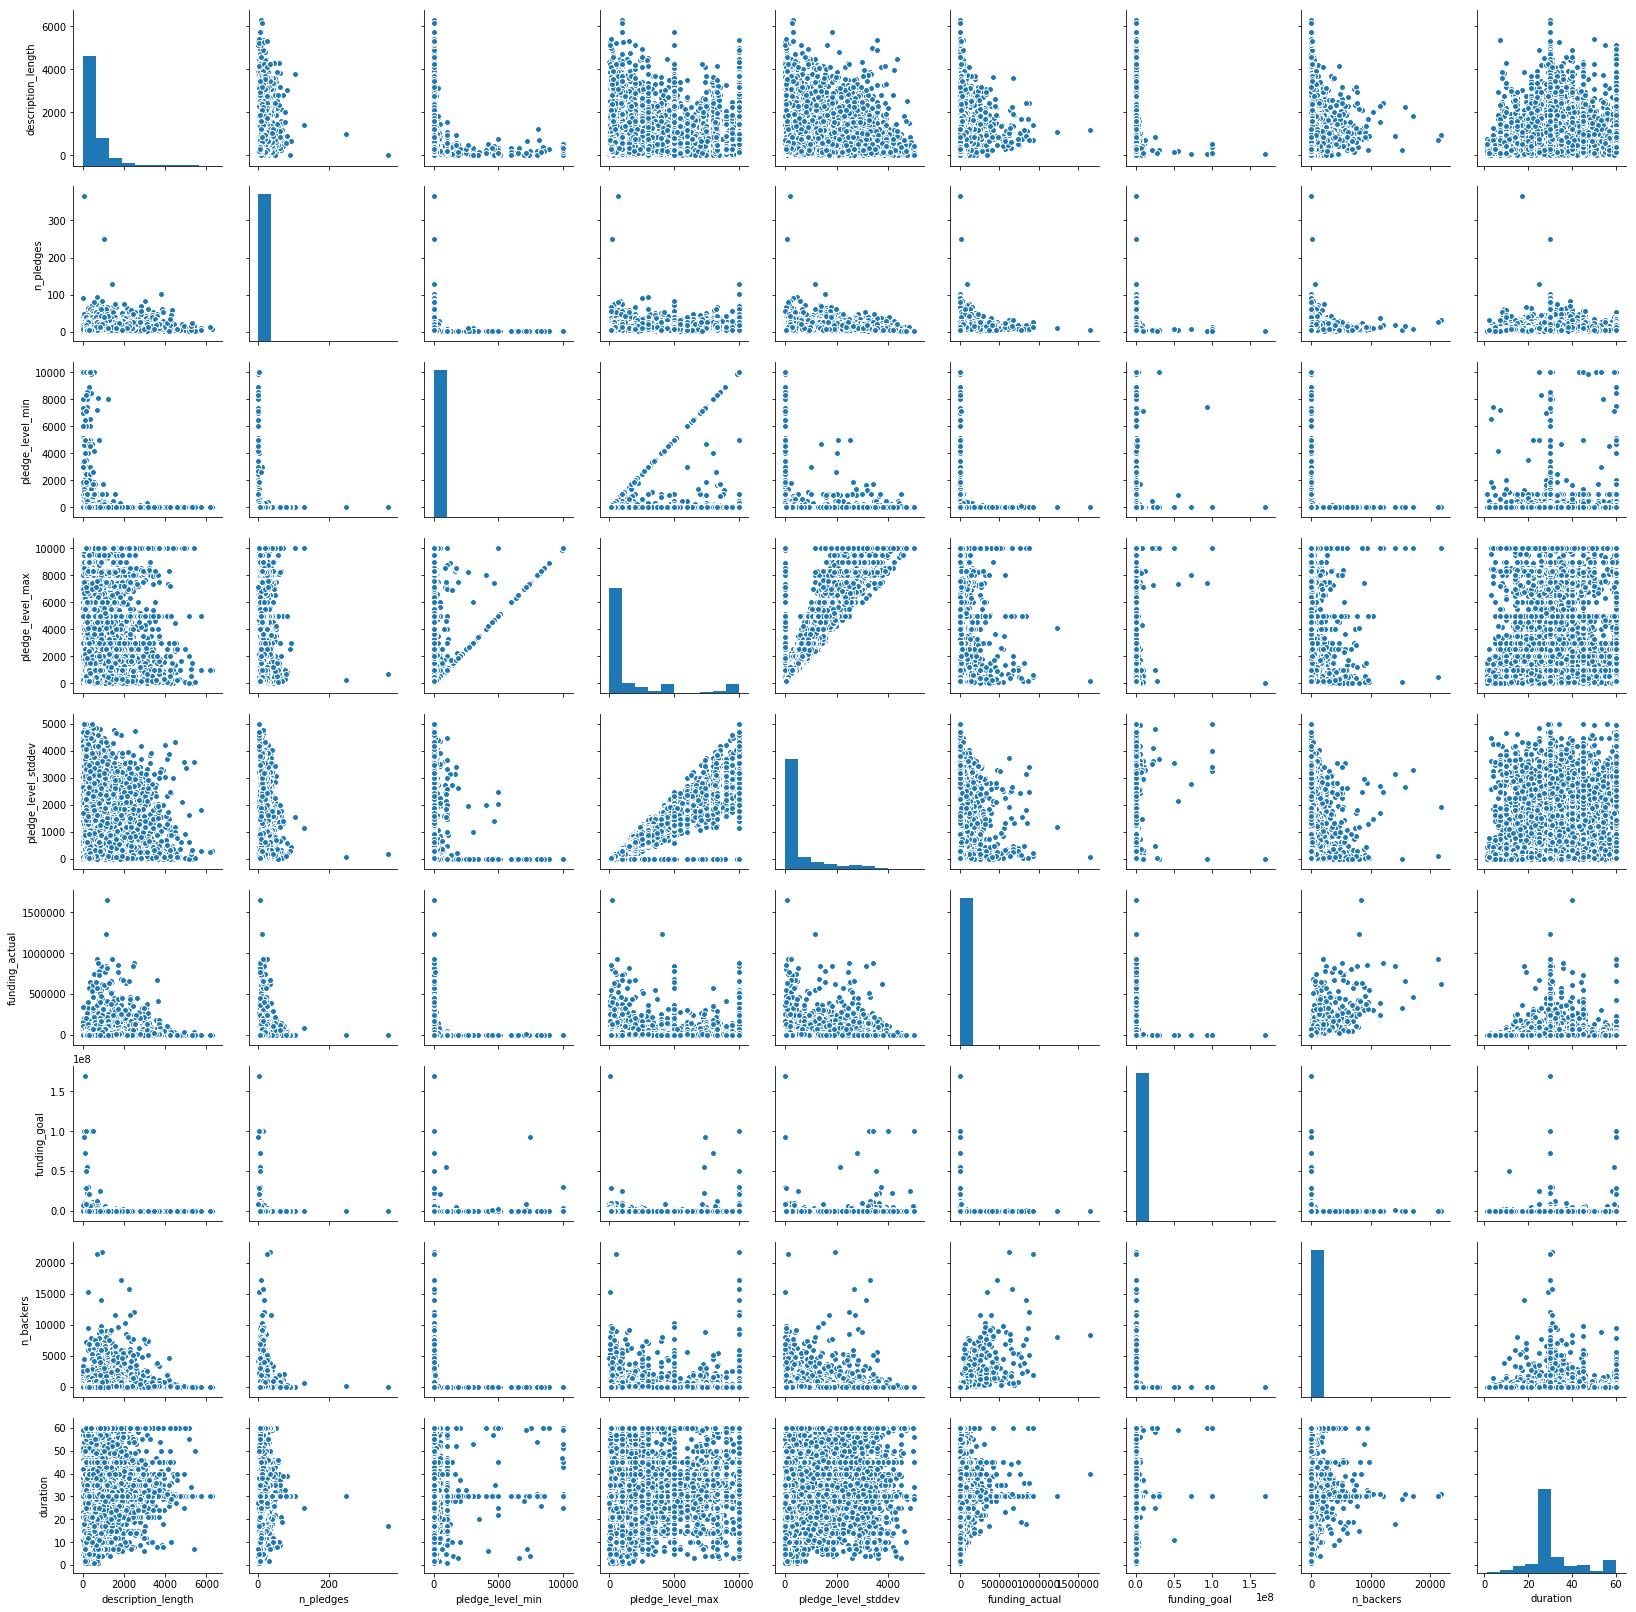

In [12]:
sns.pairplot(numeric_df)

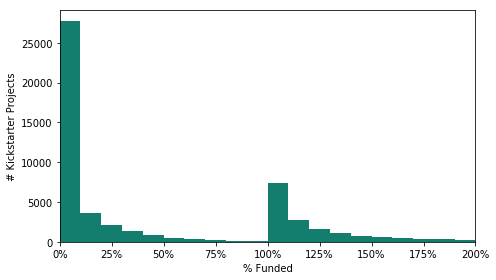

In [3]:
with open('all_data_to_model.pickle', 'rb') as f:
    plot_df = pickle.load(f)
X_plt = plot_df.drop(columns=['funding_percent'])
y_plt = plot_df.funding_percent

fig = plt.figure(figsize=(7,4))
ax = fig.add_subplot(1, 1, 1)
ax.hist(y_plt, bins=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,
                     1,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,
                     2], color='xkcd:blue green')
plt.xlim((0,2))
plt.xlabel('% Funded')
plt.ylabel('# Kickstarter Projects')
ax.set_xticklabels(['0%','25%','50%','75%', '100%', '125%', '150%', '175%', '200%'])
plt.tight_layout()
plt.savefig('histogram_percent_funded.png');

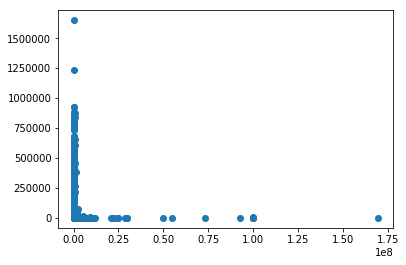

In [14]:
plt.scatter(project_df.funding_goal,project_df.funding_actual)

(0, 1)

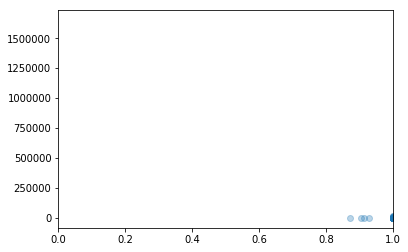

In [15]:
plt.scatter(project_df.funding_goal,project_df.funding_actual, alpha=0.3)
plt.ylim(0,1)

#### projects by category:

In [8]:
project_df.category.value_counts()

Film & Video    8515
Music           6783
Publishing      5882
Food            5170
Technology      5069
Games           4717
Art             4290
Design          4225
Fashion         3309
Photography     1990
Crafts          1575
Comics          1543
Theater         1368
Dance            692
Journalism       581
Sculpture         99
Name: category, dtype: int64